# Выпускной проект "Банки — Анализ оттока клиентов"

**<a href='https://disk.yandex.ru/i/daYOx14cLvTokw'>Презентация v2</a>**

**Заказчик:** Банк "Метанпром"  

**Задача:** Проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка.  

**Описание данных:**  Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. 

<h1>Содержание работы:<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных,-общая-информация" data-toc-modified-id="Загрузка-данных,-общая-информация-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных, общая информация</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Корректировка-типов-данных" data-toc-modified-id="Корректировка-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Корректировка типов данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Кодирование-переменных" data-toc-modified-id="Кодирование-переменных-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Кодирование переменных</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Распределение-признаков" data-toc-modified-id="Распределение-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Распределение признаков</a></span></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Корреляционный анализ</a></span></li><li><span><a href="#Портрет-клиента-в-разрезе-оттока" data-toc-modified-id="Портрет-клиента-в-разрезе-оттока-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Портрет клиента в разрезе оттока</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-различия-дохода-между-ушедшими-и-оставшимися-клиентами" data-toc-modified-id="Гипотеза-различия-дохода-между-ушедшими-и-оставшимися-клиентами-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Гипотеза различия дохода между ушедшими и оставшимися клиентами</a></span></li><li><span><a href="#Гипотеза-о-различии-в-баллах-кредитного-скоринга-у-ушедших-и-оставшимихся-клиентов" data-toc-modified-id="Гипотеза-о-различии-в-баллах-кредитного-скоринга-у-ушедших-и-оставшимихся-клиентов-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Гипотеза о различии в баллах кредитного скоринга у ушедших и оставшимихся клиентов</a></span></li></ul></li><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li><li><span><a href="#Сегментация-клиентов" data-toc-modified-id="Сегментация-клиентов-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Сегментация клиентов</a></span></li><li><span><a href="#Приоретизация-сегментов" data-toc-modified-id="Приоретизация-сегментов-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Приоретизация сегментов</a></span></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Итоговый вывод</a></span></li></ul></div>

## Загрузка данных, общая информация

In [1]:
!pip install phik

     |████████████████████████████████| 679 kB 1.1 MB/s eta 0:00:01


In [2]:
# библиотеки
import pandas as pd
import numpy as np
#from datetime import datetime, timedelta
#import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import skew, mode

import math as mth
# import plotly.express as px
# from plotly import graph_objects as go
import phik
from phik.report import plot_correlation_matrix
from phik import report
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
# загружаем данные 
path = 'https://code.s3.yandex.net/datasets/'
data = pd.read_csv(path + 'bank_scrooge.csv') 

In [4]:
# функция для просмотра данных о дф
def description(x):
    display('Первые строки таблицы:')
    display(x.head())
    print('*'*50)
    display('Общая информации о данных:')
    display(x.info())
    print('*'*50)
    display('Распределение численных показателей:')
    display(x.describe())
    print('*'*50)
    display('Проверка на явные дубликаты:')
    display(x.duplicated().sum())

In [5]:
description(data)

'Первые строки таблицы:'

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1


**************************************************


'Общая информации о данных:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

**************************************************


'Распределение численных показателей:'

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00,10000.00,9974.00,10000.00,7705.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,171814.71,848.70,42.73,2.63,827794.31,1.87,0.68,0.52,147866.89,0.18
std,33708.24,65.45,12.18,1.98,1980614.15,0.79,0.47,0.50,139388.51,0.39
min,94561.00,642.00,18.00,0.00,0.00,0.00,0.00,0.00,2546.30,0.00
25%,142810.25,802.00,33.00,0.00,295554.16,1.00,0.00,0.00,75251.90,0.00
50%,172728.00,853.00,40.00,3.00,524272.20,2.00,1.00,1.00,119658.10,0.00
75%,201261.75,900.00,51.00,4.00,980705.85,2.00,1.00,1.00,174500.54,0.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


**************************************************


'Проверка на явные дубликаты:'

0

In [6]:
display(data['churn'].value_counts())
display(data['city'].value_counts())

0    8180
1    1820
Name: churn, dtype: int64

Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64

**Вывод:** В датафрейме 10000 строк, в т.ч. данные о 8180 оставшихся и 1820 отточных клиентах из трех городов: Ярославь, Рыбинск и Ростов. Есть пропуски в столбцах с возрастом (`age`), балансом на счете (`balance`). Необходимо привести названия столбцов к единому стилю.

## Предобработка данных

### Обработка пропусков

Перед проверкой пропусков приведем названия столбцов к единому стилю.

In [7]:
data = data.rename(columns={'USERID': 'user_id', 'EST_SALARY': 'est_salary'})
# проверка
data.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

* **Столбец `age`**

In [8]:
# количество пропусков в столбце с возрастом
print('Количество пропусков в столбце с возрастом:', data['age'].isna().sum())
print('Доля пропусков в столбце, %:', data['age'].isna().sum()/data.shape[0]*100)

Количество пропусков в столбце с возрастом: 26
Доля пропусков в столбце, %: 0.26


In [9]:
data[data['age'].isna()]['churn'].value_counts()

0    25
1     1
Name: churn, dtype: int64

Вероятно, причиной пропусков в столбце с возрастом является некая техническая ошибка, пропуски можно классифицировать как отсутствующие случайно (MCAR). С учетом того, что доля этих пропусков составляет всего 0,26% от общего количества строк, их можно удалить.

In [10]:
data = data.dropna(subset=['age'])
#data['age'].isna().sum()

* **Столбец `balance`**

In [11]:
data['balance'].isna().sum()

2279

Добавим вспомогательный столбец `balance_missing` - признак пропуска в столбце balance (0 - нет пропуска, 1 - есть пропуск). 

In [12]:
data['balance_missing'] = data['balance'].isna()*1
data.sample(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing
1594,222493,803.00,Рыбинск,М,54.00,0,228857.14,1,1,1,91650.49,0,0
2012,207236,826.00,Рыбинск,М,30.00,2,478696.76,2,1,1,76410.11,0,0
6017,213400,818.00,Ярославль,Ж,41.00,4,545455.53,2,1,1,184507.40,0,0
3674,138903,914.00,Ярославль,М,27.00,0,NaN,1,1,1,50943.21,0,1
6316,174914,776.00,Ярославль,М,27.00,2,107329.14,1,1,1,40400.43,0,0


In [13]:
balance_missing = (data
                   .groupby('balance_missing')
                   .agg({'user_id':'count',
                         'est_salary':'mean',  # средняя з/п
                         'age':'mean',         # средний возраст
                         'products':'median',  # медианное кол-во продуктов
                         'equity':'median',     # медианное кол-во собственности
                        })
                   .reset_index(drop=True)
                  )
balance_missing.columns = ['count', 'avg_est_salary', 'avg_age', 'products_median', 'equity_median']
balance_missing

,count,avg_est_salary,avg_age,products_median,equity_median
0,7695,124520.39,42.92,2,4
1,2279,226345.42,42.09,1,0


In [14]:
# расшифровка по количеству баллов собственности среди пропусков
data[data['balance_missing'] == 1]['equity'].value_counts()

0    2164
1     114
3       1
Name: equity, dtype: int64

In [15]:
# расшифровка по городам среди пропусков
data[data['balance_missing'] == 1]['city'].value_counts()

Ярославль    1458
Рыбинск       586
Ростов        235
Name: city, dtype: int64

In [16]:
# расшифровка по оттоку среди пропусков
data[data['balance_missing'] == 1]['churn'].value_counts()

0    2266
1      13
Name: churn, dtype: int64

In [17]:
# расшифровка по наличию кредитной карты среди пропусков
data[data['balance_missing'] == 1]['credit_card'].value_counts()

1    1858
0     421
Name: credit_card, dtype: int64

**Вывод:**  
* Больше всего пропусков у клиентов из Ярославля. 
* В основном пропуски в балансе у оставшихся клиентов (2266), всего у 13 ушедших клиентов не заполнены данные о балансе. 
* Средний возраст в категории (есть пропуск/нет пропуска) примерно одинаковый. 
* Меданное количество продуктов у клиентов несущественно отличается.
* Прослеживается зависимость пропуска в балансе от наличия кредитной карты у клиента и низким баллом собственности.

Таким образом, можно предположить, что основное количество пропусков в данных о балансе обусловлено наличием у клиента задолженности/обязанности по выплате кредита, следовательно, эти пропуски можно классифицировать как не случайно отсутствующие (MNAR). С учетом того, что количество пропусков достаточно велико, удалять эти строки будет некорректно, но и заполнение какими-то синтетическими данными может исказить результаты исследования, поэтому эти пропуски оставим как есть.

### Корректировка типов данных

В столбцах score, age поменяем тип данных float на int.

In [19]:
data[['score', 'age']] = data[['score', 'age']].astype(int)

### Обработка дубликатов  

Посмотрим, есть ли неявные дубликаты по столбцу `user_id`.

In [20]:
data['user_id'].duplicated().sum()

50

Посмотрим на характеристики клиентов с повторяющимися идентификаторами.

In [21]:
data[data['user_id'].duplicated(keep=False)].sort_values(by='user_id').head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing
1893,116540,883,Рыбинск,Ж,55,1,362756.49,3,0,1,175920.48,1,0
7694,116540,887,Ярославль,Ж,38,0,NaN,1,0,1,119247.61,0,1
4866,117943,855,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1,0
7542,117943,880,Ярославль,Ж,40,0,NaN,1,1,0,137718.93,0,1
5863,120258,908,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327.77,1,0
5896,120258,905,Ярославль,М,30,0,NaN,1,1,1,146427.96,0,1
1411,123461,829,Ярославль,Ж,59,0,96222.44,2,0,1,102771.55,1,0
8638,123461,934,Рыбинск,М,34,0,NaN,2,1,0,291619.27,0,1
9775,124450,758,Рыбинск,Ж,36,0,73574.07,2,0,1,79963.59,0,0
8164,124450,859,Ярославль,Ж,38,6,516811.20,1,1,1,95144.63,1,0


**Вывод:** Видно, что клиенты с одинаковыми id это разные клиенты, у них отличаются все прочие параметры. При этом у повторяющихся id чередуются показатели оттока. Вероятно, когда клиент уходил из банка, его идентификатор присваивался уже новому клиенту, что не совсем корректно, естественно. Т.к. по факту эти строки не являются дубликатами, оставим, как есть.

### Кодирование переменных

In [22]:
data['gender_code'] = data['gender']#.map({'М':1, 'Ж':0})
data['city_code'] = data['city']#.map({'Ярославль':0, 'Рыбинск':1, 'Ростов':2})
data = pd.get_dummies(data, columns=['gender_code', 'city_code'])
data.sample(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing,gender_code_Ж,gender_code_М,city_code_Ростов,city_code_Рыбинск,city_code_Ярославль
4022,216692,935,Ярославль,Ж,45,0,NaN,1,1,0,753723.98,0,1,1,0,0,0,1
1922,216402,885,Ростов,М,69,1,254699.43,1,1,0,86396.37,0,0,0,1,1,0,0
946,149365,877,Ярославль,М,41,5,819182.01,2,0,0,212316.47,1,0,0,1,0,0,1
4408,126321,826,Рыбинск,М,56,4,525146.10,2,1,0,49048.33,1,0,0,1,0,1,0
363,149588,911,Ярославль,Ж,43,2,910722.01,2,1,0,173099.86,0,0,1,0,0,0,1
1002,198240,853,Ярославль,М,44,5,753543.73,4,0,0,87805.40,0,0,0,1,0,0,1
1257,135015,901,Рыбинск,М,57,2,911389.12,2,1,0,100155.08,0,0,0,1,0,1,0
4343,141945,929,Рыбинск,М,33,0,NaN,1,1,0,381868.89,0,1,0,1,0,1,0
6474,136102,793,Ярославль,М,52,0,263552.33,2,0,0,253408.49,0,0,0,1,0,0,1
6010,127118,787,Рыбинск,М,42,0,51680.95,2,1,1,146621.35,0,0,0,1,0,1,0


In [23]:
# скорректируем названия новых столбцов
data = data.rename(
    columns = ({
        'city_code_Ростов':'Ростов', 
        'city_code_Рыбинск':'Рыбинск',
        'city_code_Ярославль':'Ярославль', 
        'gender_code_Ж':'female', 
        'gender_code_М':'male'
    }))

In [24]:
data.shape

(9974, 18)

**Вывод:**  
Проведена предобработка данных: 
* Проанализированы пропуски, в т.ч. удалено незначительное количество пропусков в столбце с возрастом (`age`) - 0,26% от общего количества строк. В столбце с балансом (`balance`) большое количество пропусков (почти 23%), заполнение которых синтетическими данными исказит резульаты исследования. Чтобы не терять большой объем информации о прочих характеристиках клиентов из этих строк, пропуски оставлены как есть.
* Скорректированы типы данных в столбцах `score`, `age`, названия столбцов.
* Столбец `user_id` проверен на наличие неявных дубликатов. Анализ показал, что выявленные дубликаты таковыми не являются, строки оставлены.
* Проведено кодирование категориальных переменных для последующего анализа.  

В целом несмотря на большое количество пропусков и ошибках в столбце `user_id` данные пригодны для последующего анализа.

## Исследовательский анализ данных

### Распределение признаков


In [25]:
data.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing,female,male,Ростов,Рыбинск,Ярославль
count,9974.00,9974.00,9974.00,9974.00,7695.00,9974.00,9974.00,9974.00,9974.00,9974.00,9974.00,9974.00,9974.00,9974.00,9974.00,9974.00
mean,171755.22,848.68,42.73,2.63,827245.59,1.87,0.68,0.52,147786.81,0.18,0.23,0.50,0.50,0.14,0.27,0.59
std,33695.53,65.40,12.18,1.98,1980327.41,0.79,0.47,0.50,139285.51,0.39,0.42,0.50,0.50,0.35,0.44,0.49
min,94561.00,642.00,18.00,0.00,0.00,0.00,0.00,0.00,2546.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,142760.00,802.00,33.00,0.00,295698.71,1.00,0.00,0.00,75251.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,172643.00,853.00,40.00,3.00,524295.33,2.00,1.00,1.00,119626.79,0.00,0.00,0.00,1.00,0.00,0.00,1.00
75%,201163.75,900.00,51.00,4.00,980051.21,2.00,1.00,1.00,174499.81,0.00,0.00,1.00,1.00,0.00,1.00,1.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Средние значения показателей по отточным и оставшимся клиентам:

In [26]:
data.groupby('churn').mean()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,balance_missing,female,male,Ростов,Рыбинск,Ярославль
churn,,,,,,,,,,,,,,,
0,171928.11,845.40,43.02,2.38,733031.63,1.76,0.71,0.48,147674.64,0.28,0.53,0.47,0.14,0.28,0.58
1,170980.10,863.42,41.45,3.76,1134458.21,2.38,0.55,0.70,148289.70,0.01,0.35,0.65,0.15,0.24,0.61


Построим гистограммы распределения и диаграммы размаха для переменных и посмотрим интервалы признаков, возможные выбросы.

* **score, age, est_salary**

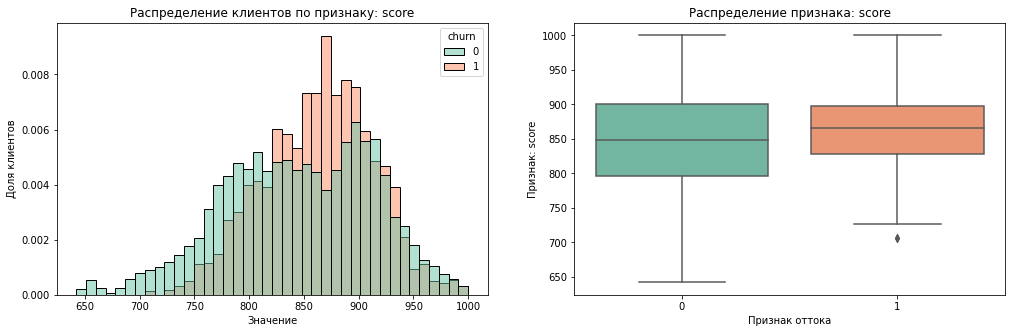

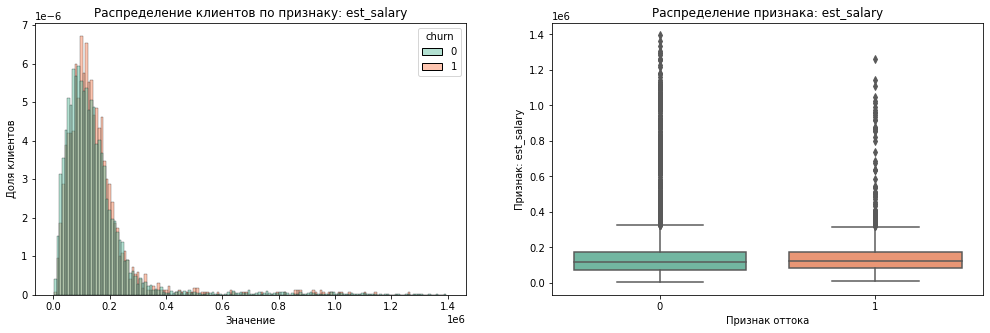

In [27]:
# графики для параметров score, est_salary
for col in data[['score', 'est_salary']].columns:

    fig, ax = plt.subplots(1, 2, figsize=(17, 5))
    # Гистограмма 
    sns.histplot(data=data, 
                 x=data[col], 
                 stat='density', 
                 palette='Set2', 
                 common_norm=False, 
                 hue='churn', 
                 ax=plt.subplot(1,2,1)
                )
    plt.title('Распределение клиентов по признаку: ' + col)
    plt.ylabel('Доля клиентов')
    plt.xlabel('Значение')
    
    # диаграмма размаха значений признака
    sns.boxplot(data=data, 
                x='churn', 
                y=data[col], 
                palette='Set2', 
                ax=plt.subplot(1, 2, 2))
    plt.title('Распределение признака: ' + col)
    plt.xlabel('Признак оттока')
    plt.ylabel('Признак: ' + col)
    
    plt.show();

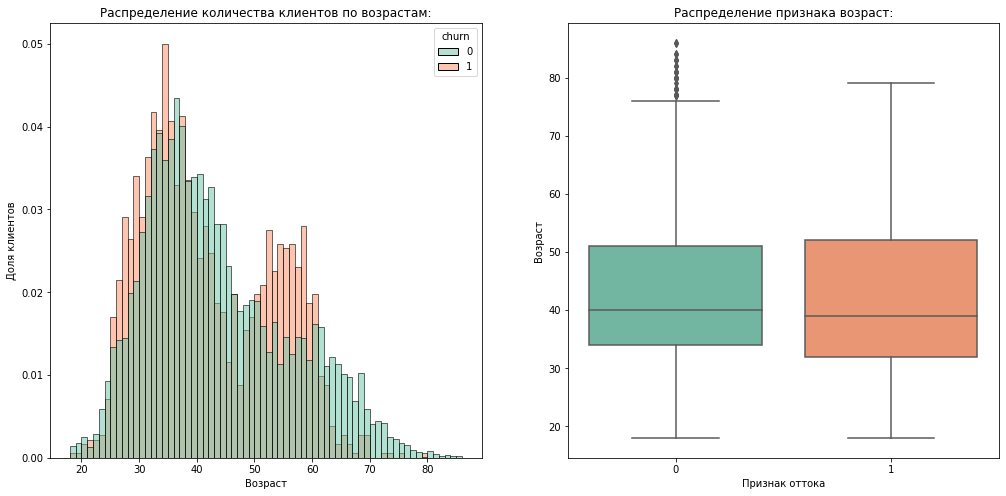

In [28]:
# графики для параметра age
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
# Гистограмма 
sns.histplot(data=data, 
             x=data['age'], 
             binwidth=1, bins=range(18, 90),
             stat='density', 
             palette='Set2', 
             common_norm=False,
             hue='churn',
             ax=plt.subplot(1,2,1))
plt.title('Распределение количества клиентов по возрастам:')
plt.ylabel('Доля клиентов')
plt.xlabel('Возраст')
    
# диаграмма размаха значений признака
sns.boxplot(data=data, 
            x='churn', 
            y=data['age'], 
            palette='Set2', 
            ax=plt.subplot(1, 2, 2))
plt.title('Распределение признака возраст:')
plt.xlabel('Признак оттока')
plt.ylabel('Возраст')
plt.show()

In [29]:
print('Процент оттока среди клиентов с баллами 850-900:', 
      round(len(data.query('churn ==1 & 850<=score<=900'))/len(data.query('850<=score<=900'))*100))
print('Процент оттока среди клиентов в возрасте 26-35 лет:', 
      round(len(data.query('churn ==1 & 26<=age<=35'))/len(data.query('26<=age<=35'))*100))
print('Процент оттока среди клиентов в возрасте 50-61 лет:', 
      round(len(data.query('churn ==1 & 50<=age<=61'))/len(data.query('50<=age<=61'))*100))

Процент оттока среди клиентов с баллами 850-900: 26
Процент оттока среди клиентов в возрасте 26-35 лет: 22
Процент оттока среди клиентов в возрасте 50-61 лет: 25


* Среди клиентов с баллами скоринга в диапазоне 850-900 отток выше, чем у прочих клиентов - 26%.
* Наибольший отток (22%) наблюдается среди клиентов в возрасте 26-35 и, особенно, 50-61 г. (25%). Клиенты старше 75 лет скорее аномалия. 
* Оценочный доход клиентов в среднем примерно на одном уровне в обеих сравниваемых группах. В обеих группах есть выбросы, рассмотрим их подробнее ниже.

* **equity, products**

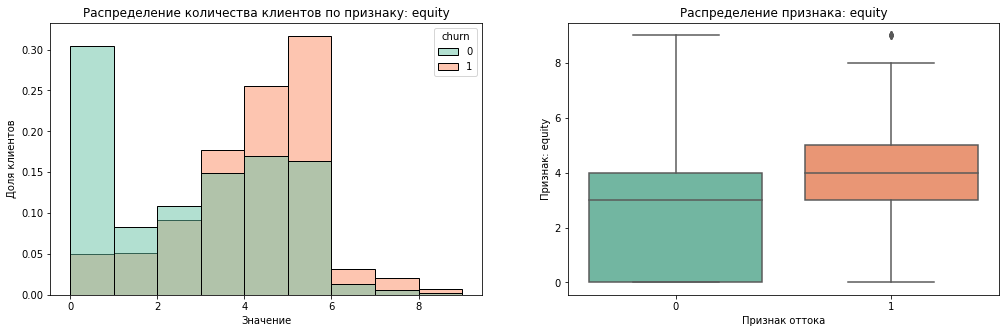

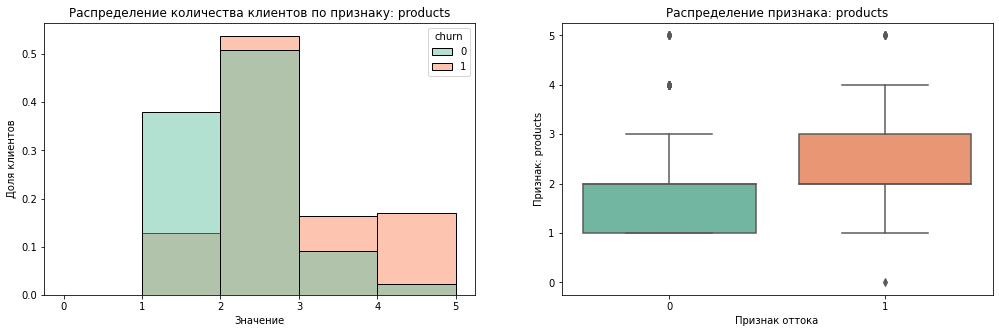

In [30]:
# графики для параметров equity, products
for col in data[['equity', 'products']].columns:

    fig, ax = plt.subplots(1, 2, figsize=(17, 5))
    # Гистограмма 
    sns.histplot(data=data, x=data[col], binwidth=1, 
                 stat='density', palette='Set2', common_norm=False, 
                 hue='churn', 
                 ax=plt.subplot(1,2,1))
    plt.title('Распределение количества клиентов по признаку: ' + col)
    plt.ylabel('Доля клиентов')
    plt.xlabel('Значение')
    
    # диаграмма размаха значений признака
    sns.boxplot(data=data, x='churn', y=data[col], 
                palette='Set2', 
                ax=plt.subplot(1, 2, 2))
    plt.title('Распределение признака: ' + col)
    plt.xlabel('Признак оттока')
    plt.ylabel('Признак: ' + col)
    
    plt.show()

На диаграмме размаха для показателя количества продуктов заметна аномалия - количество продуктов клиента равное 0. Посмотрим эту строку подробнее.

In [31]:
data[data['products'] == 0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing,female,male,Ростов,Рыбинск,Ярославль
8957,147837,962,Рыбинск,Ж,79,3,NaN,0,0,0,25063.96,1,1,1,0,0,1,0


Такая строка одна: клиентке 79 лет, она неактивна, у нее не заполнены данные о балансе и нет продуктов. Возможно, клиент скорее мертв, чем жив и его обслуживание прекращено, но данные не заархивированы. В любом случае, эта строка не несет никакой ценности, удалим ее.

In [32]:
data = data.query('products != 0')

In [33]:
print('Процент оттока среди клиентов с баллами собственности >3:', 
      round(len(data.query('churn ==1 & equity>3'))/len(data.query('equity>3'))*100))
print('Процент оттока среди клиентов с 3 и более продуктами:', 
      round(len(data.query('churn ==1 & products>=3'))/len(data.query('products>=3'))*100))

Процент оттока среди клиентов с баллами собственности >3: 28
Процент оттока среди клиентов с 3 и более продуктами: 40


* Количество баллов собственности (equity) у отточных клиентов больше, много оставшихся клиентов с баллом 1. Есть незначительное количество выбросов среди отточных клиентов.  
* Количество продуктов, которыми пользуется клиент у отточных клиентов больше.

* **balance**

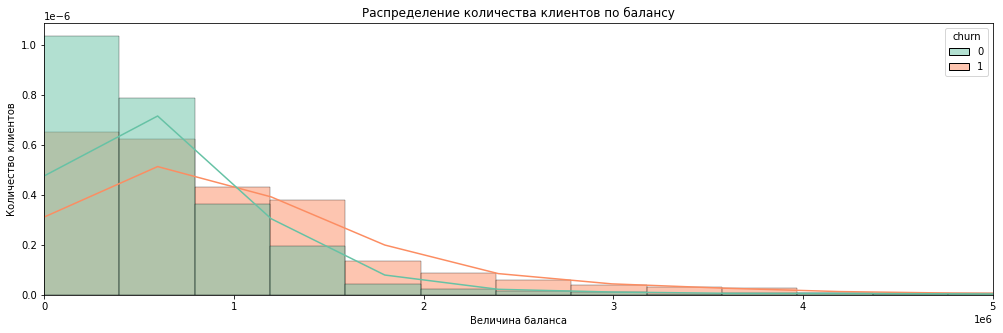

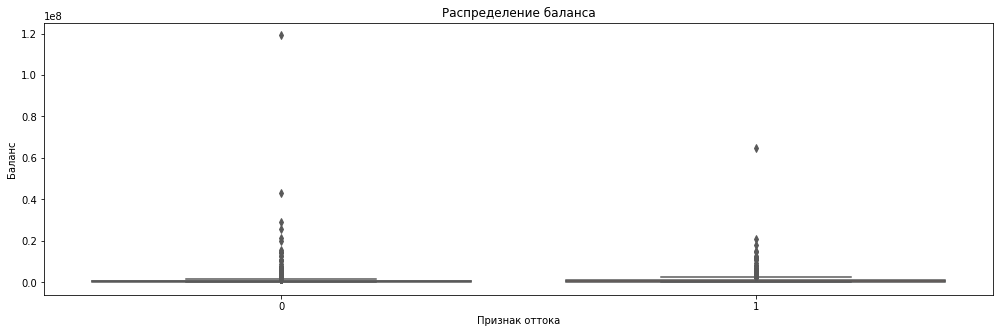

In [34]:
# Гистограмма 
plt.figure(figsize=(17,5))
sns.histplot(data=data, 
             x=data['balance'], 
             bins=300, 
             palette='Set2', 
             hue='churn', 
             stat='density', 
             kde=True, 
             common_norm=False)
plt.title('Распределение количества клиентов по балансу')
plt.xlim([0, 5000000])
plt.ylabel('Количество клиентов')
plt.xlabel('Величина баланса')
plt.show()
# диаграмма размаха значений признака
plt.figure(figsize=(17, 5))
sns.boxplot(data=data, 
            x='churn', 
            y=data['balance'], 
            palette='Set2')
plt.title('Распределение баланса')
plt.xlabel('Признак оттока')
plt.ylabel('Баланс')
    
plt.show()

In [35]:
print('Процент оттока среди клиентов с балансом более 1 млн. руб.:', 
      round(len(data.query('churn ==1 & balance >= 1000000'))/len(data.query('balance >= 1000000'))*100))

Процент оттока среди клиентов с балансом более 1 млн. руб.: 39


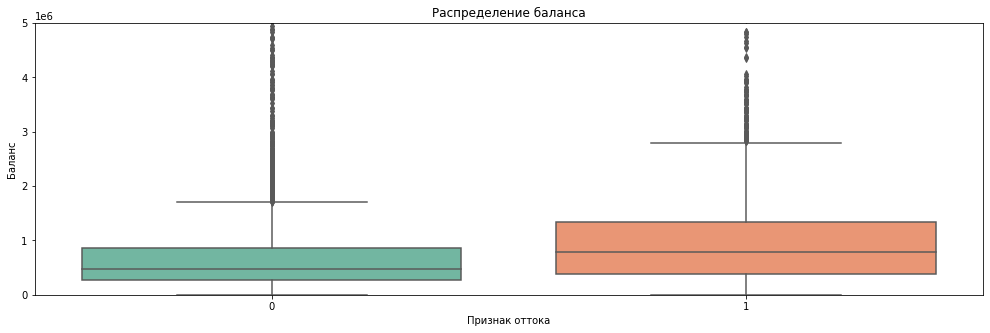

In [36]:
# боксплот покрупнее
plt.figure(figsize=(17, 5))
sns.boxplot(data=data, x='churn', y=data['balance'], palette='Set2')
plt.title('Распределение баланса')
plt.xlabel('Признак оттока')
plt.ylabel('Баланс')
plt.ylim([0, 5000000])
plt.show()

Баланс на счете у отточных клиентов ощутимо выше, в обеих категориях много выбросов, рассмотрим их подробнее ниже.

Среди таких признаков как возраст, заработная плата и остаток на балансе есть выбросы. Рассмотрим их подробнее.

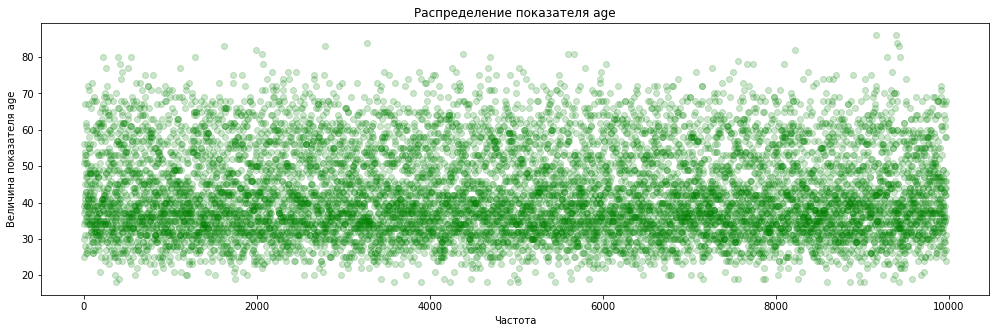

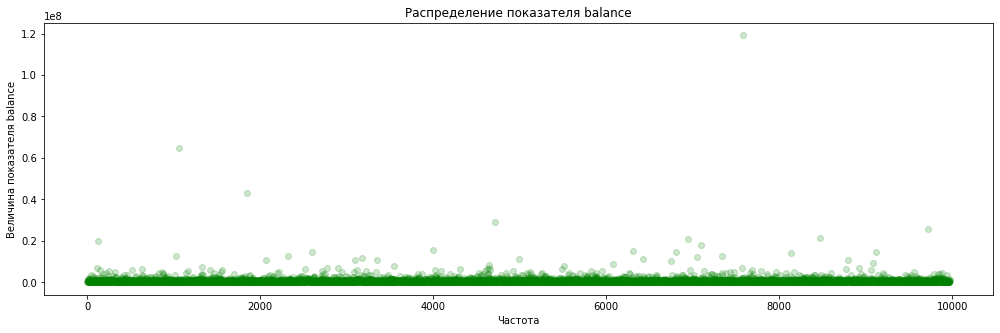

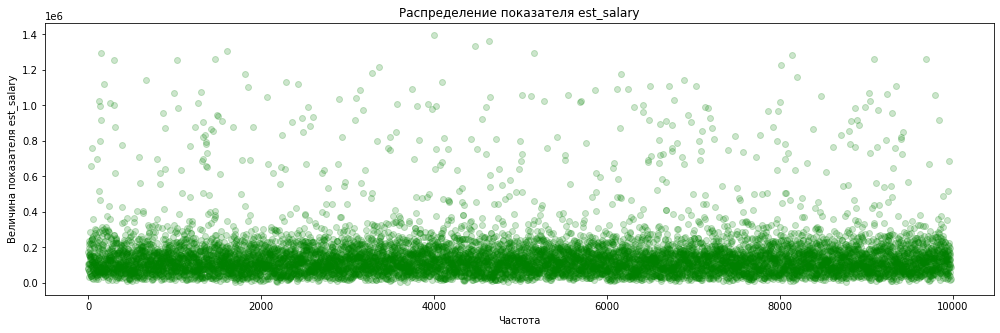

In [37]:
# построим точечные графики для возраста, баланса, з/п
for col in ['age', 'balance', 'est_salary']:
    plt.figure(figsize=(17, 5))
    x_values = pd.Series(range(0, len(data[col])))
    plt.scatter(x_values, data[col], alpha=0.2, color='green')
    plt.xlabel('Частота')
    plt.ylabel('Величина показателя ' + col)
    plt.title('Распределение показателя ' + col)
    plt.show();

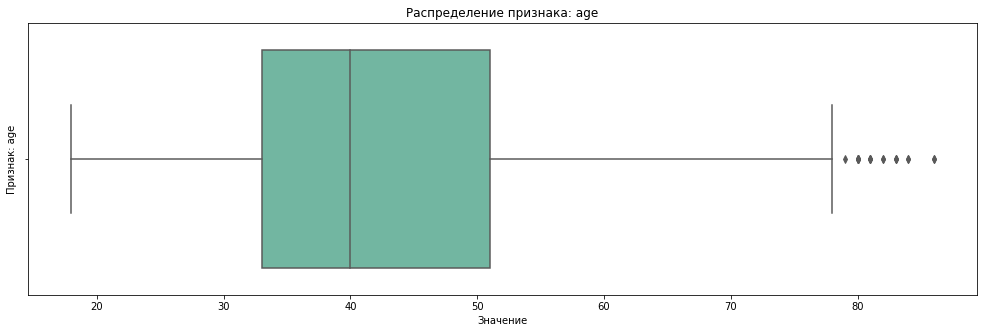

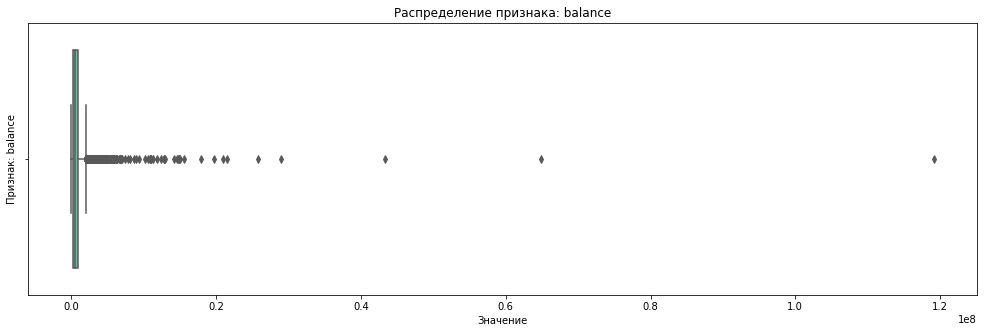

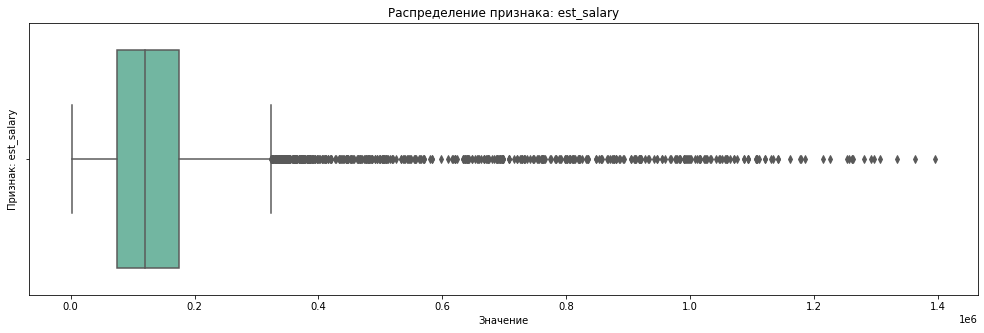

In [38]:
# боксплоты
for col in ['age', 'balance', 'est_salary']:
    plt.figure(figsize=(17, 5))
    sns.boxplot(x=col, data=data, palette='Set2')
    plt.title('Распределение признака: ' + col)
    plt.xlabel('Значение')
    plt.ylabel('Признак: ' +col)
    plt.show();

Рассчитаем дополнительно 95 и 99й перцентили для этих показателей.

In [39]:
print('Количество клиентов старше ', 
      np.percentile(data['age'], 99),
      len(data[data['age'] > np.percentile(data['age'], 99)])
     )

print('Количество клиентов с балансом на счете более', 
      (np.percentile(data[data['balance']>=0]['balance'], 95)).round(0), ':',
      len(data[data['balance'] > np.percentile(data[data['balance']>=0]['balance'], 95)]))

print('Количество клиентов с з/п более ', 
      (np.percentile(data['est_salary'], 95)).round(0), 
      len(data[data['est_salary'] > np.percentile(data['est_salary'], 95)]))

print('Количество клиентов с з/п более ', 
      (np.percentile(data['est_salary'], 99)).round(0), 
      len(data[data['est_salary'] > np.percentile(data['est_salary'], 99)]))

Количество клиентов старше  73.0 83
Количество клиентов с балансом на счете более 2114078.0 : 385
Количество клиентов с з/п более  316367.0 499
Количество клиентов с з/п более  886344.0 100


Удалим те строки, где возраст клиентов превышает 73 года, з/п и баланс превышают 95-й и 99-й перцентили соответственно.

In [40]:
data = data.query('age <= 73 & est_salary <= 316367').query('balance<=2114078 or balance.isna()')
data.shape

(9133, 18)

* **city, gender, credit_card, last_activity**

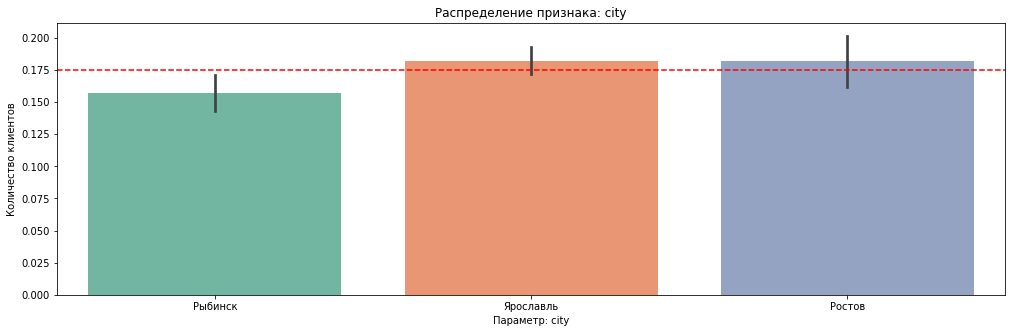

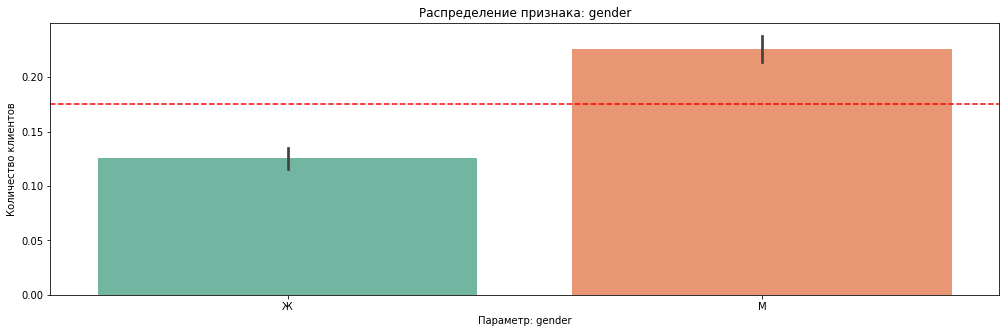

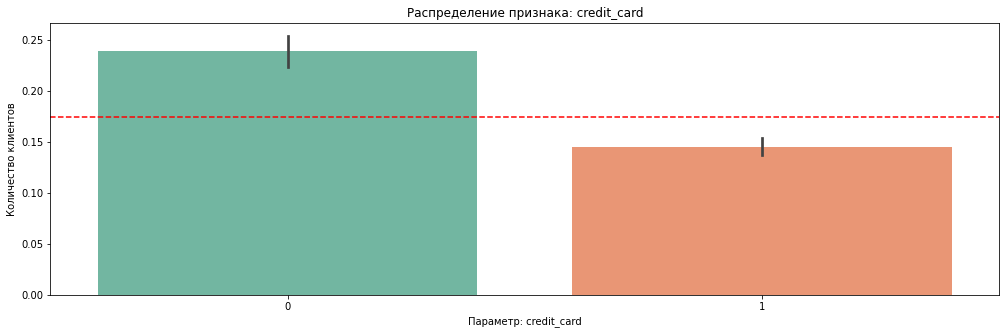

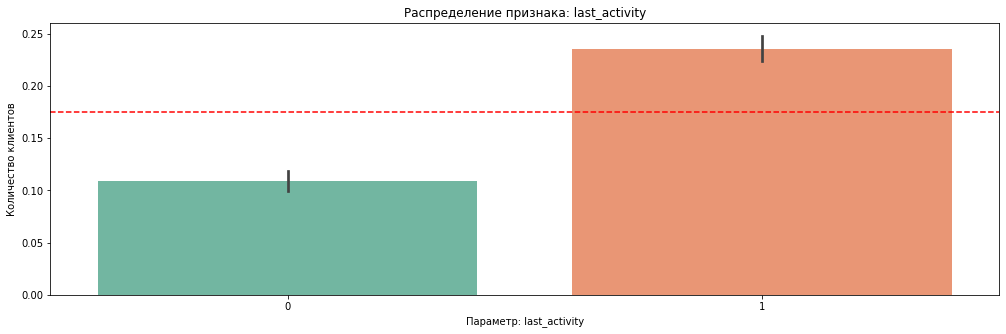

In [41]:
for col in data[['city', 'gender', 'credit_card', 'last_activity']].columns:
    plt.figure(figsize=(17, 5))
    sns.barplot(data=data, x=col, y='churn', palette='Set2')
    plt.axhline(y=data['churn'].mean(), color='red', linestyle='--')
    plt.title('Распределение признака: ' + col)
    plt.xlabel('Параметр: ' + col)
    plt.ylabel('Количество клиентов')
    plt.show()

In [42]:
print('Процент оттока среди клиентов-мужчин:', 
      round(len(data.query('churn ==1 & gender == "М"'))/len(data.query('gender == "М"'))*100))
print('Процент оттока среди клиентов-женщин:', 
      round(len(data.query('churn ==1 & gender == "Ж"'))/len(data.query('gender == "Ж"'))*100))
print('Процент оттока среди клиентов без кредитных карт:', 
      round(len(data.query('churn ==1 & credit_card == 0'))/len(data.query('credit_card == 0'))*100))
print('Процент оттока среди активных клиентов:', 
      round(len(data.query('churn ==1 & last_activity == 1'))/len(data.query('last_activity == 1'))*100))


Процент оттока среди клиентов-мужчин: 23
Процент оттока среди клиентов-женщин: 13
Процент оттока среди клиентов без кредитных карт: 24
Процент оттока среди активных клиентов: 24


* В Рыбинске показатели оттока ниже, чем в среднем по банку, в то время как в Ярославле и Ростове этот показатель чуть выше среднего по банку. 
* Отток среди мужчин превышает среднее значение по банку. 
* Отток среди владельцев кредитных карт ощутимо ниже чем среди тех клиентов, у которых нет кредиток. Среди активных клиентов отток также значительно выше.

В разрезе признаков можно сделать следующие **выводы**:
* Баллы кредитного скоринга (`score`) в среднем примерно одинаковые, у отточных клиентов чуть выше, чем у оставшихся.
* Возраст клиентов (`age`): наибольший отток среди клиентов в возрасте 26-35 и 50-61 лет. Клиенты старше 75 лет - аномалия. 
* Оценочный доход клиента (`est_salary`) в среднем примерно на одном уровне в обеих сравниваемых группах. В обеих группах есть выбросы.  
* Город (`city`) - в Рыбинске показатели оттока ниже, чем в среднем по банку, в то время как в Ярославле и Ростове этот показатель чуть выше. 
* Пол (`gender`) показатель оттока среди мужчин превышает среднее значение по банку. 
* Количество баллов собственности (`equity`) у отточных клиентов больше, много оставшихся клиентов с баллом 1.  
* Баланс на счёте (`balance`) у отточных клиентов в среднем в два раза больше.
* Количество продуктов, которыми пользуется клиент (`products`) у отточных клиентов больше.
* Наличие кредитной карты (`credit_card`): среди владельцев карт отток почти в два раза меньше.
* Среди активных клиентов (`last_activity`) отток также значительно выше.

**Таким образом, можно выделить признаки, влияющие на отток клиента: возраст, город, пол клиента, количество баллов собственноисти и продуктов, наличие/отсутствие кредитной карты, активность клиента.**

### Корреляционный анализ

Для исследования корреляции между признаками воспользуемся методами библиотеки phik, которые позволяют вычислять взаимосвязи между различными типами признаков (категориальными, непрерывными и их комбинациями). Рассчитаем аналог коэффициента корреляции Пирсона на отрезке от 0 (нулевая взаимосвязь) до 1 (максимальная взаимосвязь), построим матрицу корреляции и визуализируем ее с помощью тепловой карты.

In [43]:
data.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn',
       'balance_missing', 'female', 'male', 'Ростов', 'Рыбинск', 'Ярославль'],
      dtype='object')

In [44]:
# уберем ненужные столбцы и установим индексами значения столбца user_id
data_corr2 = data.drop(['city', 'gender', 'balance_missing'], axis=1).set_index('user_id')

phik_corr = data_corr2.phik_matrix(interval_cols =['score', 'age', 'equity', 'balance', 'products', 'est_salary'])
# plot_correlation_matrix(phik_corr.values, 
#                         x_labels=phik_corr.columns, 
#                         y_labels=phik_corr.index, 
#                         vmin=0, vmax=1, 
#                         color_map='coolwarm', 
#                         title='Матрица корреляции', 
#                         figsize=(8, 8),
                        
#                        )
# plt.tight_layout()

Для наглядности выведем в виде тепловой карты только строку зависимости оттока от остальных признаков.

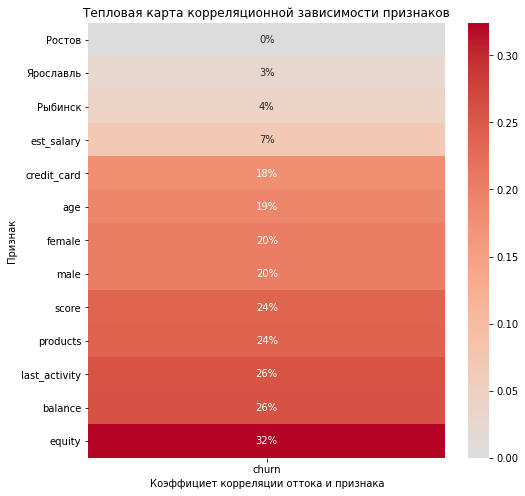

In [45]:
plt.figure(figsize=(8, 8)) 
sns.heatmap(phik_corr.loc[:,['churn']]
            .drop('churn')
            .sort_values('churn'), 
            annot=True, 
            fmt='.0%', 
            cmap='coolwarm', 
            center=0)
plt.title('Тепловая карта корреляционной зависимости признаков', fontsize = 12)
plt.xlabel('Коэффициет корреляции оттока и признака')
plt.ylabel('Признак')
plt.show()

**Вывод:** Наибольшая корреляция у оттока наблюдается с такими признаками как: количество баллов собственности (`equity`), баланс на счете (`balance`), активность (`last_activity`), количество продуктов клиента (`products`), баллы скоринга (`score`), но зависимость не особо сильная.

### Портрет клиента в разрезе оттока

In [46]:
churn_level = round(len(data[data['churn'] == 1])/len(data), 2)
print('Процент оттока в целом по банку:', churn_level)

Процент оттока в целом по банку: 0.18


In [47]:
portrait = (data
            .groupby('churn')
            .agg({'score':'mean', 
                  'age':'mean', 
                  'equity':'median',
                  'balance':'mean',
                  'products':'median',
                  'est_salary':'mean',
                  })
            .round(2))

portrait.columns = ['mean_score', 'mean_age', 'median_equity', 'mean_balance', 'median_products', 'mean_est_salary']
portrait = portrait.T
portrait.columns=['no_churn', 'churn']
portrait['difference'] = portrait['no_churn']/portrait['churn']
portrait

,no_churn,churn,difference
mean_score,842.43,856.20,0.98
mean_age,42.62,41.24,1.03
median_equity,3.00,4.00,0.75
mean_balance,571516.62,778504.00,0.73
median_products,2.00,2.00,1.00
mean_est_salary,121027.75,122481.31,0.99


In [49]:
(data
 .groupby('churn')
 .agg({'city': lambda x: x.mode().iat[0], 
       'gender': lambda x: x.mode().iat[0],
      }).T
)

churn,0,1
city,Ярославль,Ярославль
gender,Ж,М


**Вывод:** В разрезе оттока наиболее ощутимые различия заметны по таким признакам как: медианное количество баллов собственности, средний баланс на счете (эти показатели у "отточных" клиентов выше), пол (мужчин среди отточных клиентов больше).

## Проверка гипотез

### Гипотеза различия дохода между ушедшими и оставшимися клиентами  

Сфорулируем нулевую и альтернативную гипотезы:  

**H0:** Средний доход оставшихся клиентов равен среднему доходу отточных клиентов.   
**H1:** Средний доход оставшихся клиентов отличается от среднего дохода отточных клиентов.  

Создадим две выборки с доходами оставшихся и отточных клиентов.

In [50]:
salary_0 = data[data['churn'] == 0]['est_salary']
salary_1 = data[data['churn'] == 1]['est_salary']

Условием применения t-теста Стьюдента является соблюдение следующих условий:
1. Генеральные совокупности не зависят друг от друга. - Условие выполняется. 
2. Выборочные средние нормально распределены. - Количество наблюдений достаточно велико и, поэтому с учетом ЦПТ распределение выборочных средних будет близко к нормальному. 
3. Дисперсии рассматриваемых генеральных совокупностей равны.  

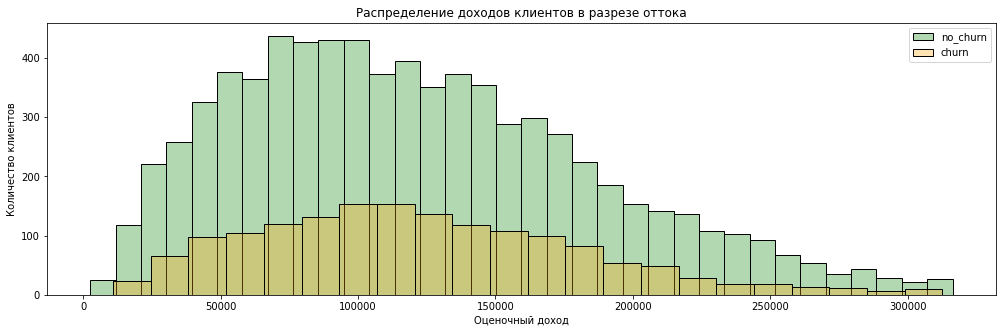

In [51]:
# распределение выборок
plt.figure(figsize=(17, 5))
sns.histplot(data=salary_0, 
             color='green', alpha=0.3, label='no_churn')

sns.histplot(data=salary_1, 
             color='orange', alpha=0.3, label='churn')
plt.title('Распределение доходов клиентов в разрезе оттока')
plt.xlabel('Оценочный доход')
plt.ylabel('Количество клиентов')
plt.legend()
plt.show()

Проверим выборки на нормальность с помощью критерия Шапиро-Уилка:

Зададим уровень статистической значимости альфа равный 0,05.

In [52]:
alpha = 0.05

In [53]:
# выборка 1
results_0 = st.shapiro(salary_0)
results_1 = st.shapiro(salary_1)

p_value_0 = results_0[1]  # второе значение в массиве результатов (с индексом 1) - p-value
p_value_1 = results_1[1]
print('p-значение: ', p_value_0)
if p_value_0 < alpha:
    print('Отвергаем нулевую гипотезу: распределение первой выборки не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 
    
print('p-значение: ', p_value_1)
if p_value_1 < alpha:
    print('Отвергаем нулевую гипотезу: распределение второй выборки не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  1.1992529739213448e-37
Отвергаем нулевую гипотезу: распределение первой выборки не нормально
p-значение:  3.9175652328359695e-16
Отвергаем нулевую гипотезу: распределение второй выборки не нормально


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [54]:
# test_leven, p = st.levene(salary_0, salary_1)
# if p < alpha:
#     print('Отвергаем гипотезу о равенстве дисперсий.')
# else:
#     print('Не получилось отвергнуть гипотезу о равенстве дисперсий.')

# print('Дисперсия выборки с доходами оставшихся клиентов: ', np.var(salary_0, ddof=1).round(0))
# print('Дисперсия выборки с доходами отточных клиентов: ', np.var(salary_1, ddof=1).round(0))


С учетом того, что распределения выборок не нормальны для проверки наличия статистически значимых различий между выборками воспользуемся критерием Манна-Уитни:

In [55]:
print('Средний доход оставшихся клиентов:', salary_0.mean().round(2))
print('Средний доход отточных клиентов:', salary_1.mean().round(2))

results = st.mannwhitneyu(salary_0, salary_1)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

Средний доход оставшихся клиентов: 121027.75
Средний доход отточных клиентов: 122481.31
p-значение: 0.08644132870846934
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


**Вывод:** По резульатам проведения теста не получилось отвергнуть нулевую гипотезу о равенстве доходов оставшихся и отточных клиентов, статистически значимых различий в уровне доходов между двумя группами клиентами нет.


### Гипотеза о различии в баллах кредитного скоринга у ушедших и оставшимихся клиентов  

Сфорулируем нулевую и альтернативную гипотезы:  

**H0:** Средний балл кредитного скоринга оставшихся клиентов равен среднему баллу отточных клиентов.   
**H1:** Средний балл кредитного скоринга оставшихся клиентов отличается от среднего балла отточных клиентов.  

Создадим две выборки с баллами скоринга оставшихся и отточных клиентов.

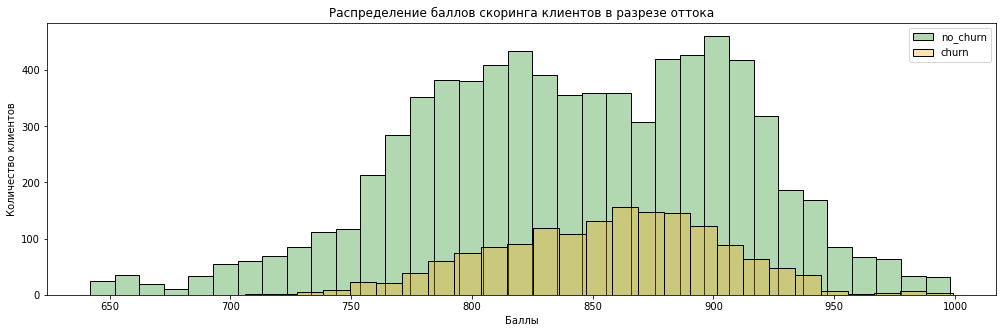

In [56]:
score_0 = data[data['churn'] == 0]['score']
score_1 = data[data['churn'] == 1]['score']
# распределение выборок
plt.figure(figsize=(17, 5))
sns.histplot(data=score_0, color='green', alpha=0.3, label='no_churn')
sns.histplot(data=score_1, color='orange', alpha=0.3, label='churn')
plt.title('Распределение баллов скоринга клиентов в разрезе оттока')
plt.xlabel('Баллы')
plt.ylabel('Количество клиентов')
plt.legend()
plt.show()

In [57]:
# проверка на нормальность
p_value_0 = score_0[1]  
print('p-значение: ', p_value_0)
if p_value_0 < alpha:
    print('Отвергаем нулевую гипотезу: распределение первой выборки не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  861
Не получилось отвергнуть нулевую гипотезу, всё нормально


In [58]:
# проверка дисперсий
test_leven, p = st.levene(score_0, score_1)
if p < alpha:
    print('Отвергаем гипотезу о равенстве дисперсий.')
else:
    print('Не получилось отвергнуть гипотезу о равенстве дисперсий.')
print('Дисперсия выборки с баллами оставшихся клиентов: ', np.var(score_0, ddof=1).round(2))
print('Дисперсия выборки с баллами отточных клиентов: ', np.var(score_1, ddof=1).round(2))

Отвергаем гипотезу о равенстве дисперсий.
Дисперсия выборки с баллами оставшихся клиентов:  4319.1
Дисперсия выборки с баллами отточных клиентов:  2166.38


С учетом того, что дисперсии выборок не равны, при вызове метода `scipy.stats.ttest_ind()` установим параметр `equal_var=False`.

In [59]:
print('Средний балл оставшихся клиентов:', score_0.mean().round(2))
print('Средний балл отточных клиентов:', score_1.mean().round(2))

results = st.ttest_ind(score_0, score_1, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.") 

Средний балл оставшихся клиентов: 842.43
Средний балл отточных клиентов: 856.2
p-значение: 7.973168916205768e-23
Отвергаем нулевую гипотезу.


**Вывод:** По резульатам проведения t-теста Стьюдента нулевая гипотеза о равенстве баллов скоринга оставшихся и отточных клиентов отвергается, у выборок баллов скоринга групп осташихся и отточных клиентов есть статистически значимые различия.

## Промежуточные выводы  

По результатам проведенного исследовательского анализа можно выделить следующие характеристики клиентов, наиболее склонных к оттоку (в порядке убывания влияния признака):

1. Клиенты с баллами собственности более 3.
2. Клиенты с балансом на счете более 1 млн. рублей.
3. Среди активных клиентов отток также значительно выше.
4. Клиенты с 3 и более продуктами уходят чаще.
5. Клиенты с баллами скоринга в диапазоне 850-900.
6. Клиентов в возрасте 30-35 и, особенно, 50-60 лет. 
7. Клиенты мужского пола. 
8. Клиенты без кредитных карт.


## Сегментация клиентов


Проведенный исследовательский анализ позволил выделить интервалы и значения признаков, наиболее характерных для отточных клиентов:  

* Клиенты, пользующиеся 3 и более продуктами - отток 40%.
* Клиенты с балансом на счете более 1 млн. рублей - отток 39%.
* Клиенты, имеющие балл собственности более 3 - отток 28%.
* Клиенты с баллами кредитного скоринга в диапазоне 850-900 - отток 26%.
* Клиентов в возрасте 26-35 (22%) и, особенно, 50-61 лет (25%).
* Активные клиенты более склонны к оттоку (24%).
* Клиенты без кредитных карт (24%).
* Клиенты мужского пола (23%). 

С учетом этого выделим сегменты клиентов банка, наиболее склонных к оттоку, распределив наиболее "значимые" признаки по разным сегментам, и проверим уровень оттока в каждом из сегментов, сравнив его с общебанковским.

In [60]:
print('Процент оттока по банку:', churn_level*100)

Процент оттока по банку: 18.0


**1. Клиенты мужского пола с балансом на счете более 1 млн.**


In [61]:
segment_1 = data.query('gender == "М" & balance > 1000000')
print('Количество клиентов в сегменте:', len(segment_1))
print('Количество отточных клиентов в сегменте:', len(segment_1.query('churn == 1')))
print('Процент оттока в сегменте:', round((len(segment_1.query('churn == 1'))/len(segment_1)*100), 0))

Количество клиентов в сегменте: 705
Количество отточных клиентов в сегменте: 324
Процент оттока в сегменте: 46.0


**2. Активные клиенты с 3 и более продуктами**

In [62]:
segment_2 = data.query('last_activity == 1 & products >= 3')
print('Количество клиентов в сегменте:', len(segment_2))
print('Количество отточных клиентов в сегменте:', len(segment_2.query('churn == 1')))
print('Процент оттока в сегменте:', round((len(segment_2.query('churn == 1'))/len(segment_2)*100), 0))

Количество клиентов в сегменте: 718
Количество отточных клиентов в сегменте: 325
Процент оттока в сегменте: 45.0


**3. Активные клиенты с баллами собственности более 3 и баллами скоринга в диапазоне 850-900**

In [63]:
segment_3 = data.query('equity >= 3 & 850 <= score <=900 & last_activity == 1')
print('Количество клиентов в сегменте:', len(segment_3))
print('Количество отточных клиентов в сегменте:', len(segment_3.query('churn == 1')))
print('Процент оттока в сегменте:', round((len(segment_3.query('churn == 1'))/len(segment_3)*100), 0))

Количество клиентов в сегменте: 864
Количество отточных клиентов в сегменте: 473
Процент оттока в сегменте: 55.0


**4. Клиенты в возрасте 26-35 лет, не имеющие кредитных карт**

In [64]:
segment_4 = data.query('credit_card == 0 & 26 <= age <= 35')
print('Количество клиентов в сегменте:', len(segment_4))
print('Количество отточных клиентов в сегменте:', len(segment_4.query('churn == 1')))
print('Процент оттока в сегменте:', round((len(segment_4.query('churn == 1'))/len(segment_4)*100), 0))

Количество клиентов в сегменте: 732
Количество отточных клиентов в сегменте: 244
Процент оттока в сегменте: 33.0


**Вывод:** В результате сегментирования выделены следующие группы клиентов, наиболее склонных к оттоку. В каждом из сегментов процент оттока ощутимо превышает общебанковский (18%):  

1. Клиенты мужского пола с балансом на счете более 1 млн. рублей: размер сегмента - 705 чел., процент оттока - 46.0%.
2. Активные клиенты с 3 и более продуктами: размер сегмента - 718 чел., процент оттока - 45.0%.
3. Активные клиенты с баллами собственности более 3 и баллами скоринга в диапазоне 850-900: размер сегмента - 864 чел., процент оттока - 55.0%.
4. Клиенты в возрасте 26-35 лет, не имеющие кредитных карт: размер сегмента - 732 чел., процент оттока - 33.0%.

## Приоретизация сегментов

Соберем информацию о выделенных сегментах в датафрем и приоретизируем их с учетом процента оттока по сегменту.

In [65]:
# названия
names = ['segment_1', 'segment_2', 'segment_3', 'segment_4']
# размеры сегментов
segment_size = [len(segment_1), len(segment_2), len(segment_3), len(segment_3)]
# отток в сегмента
segment_churn = [round(len(segment_1.query('churn == 1'))/len(segment_1), 2)*100.0,
                 round(len(segment_2.query('churn == 1'))/len(segment_2), 2)*100.0,
                 round(len(segment_3.query('churn == 1'))/len(segment_3), 2)*100.0,
                 round(len(segment_4.query('churn == 1'))/len(segment_4), 2)*100.0
                ]
# параметры, на основе которых формировался сегмент
segment_description = ['gender == "М" & balance > 1000000',
                       'last_activity == 1 & products >= 3', 
                       'equity >= 3 & 850 <= score <=900 & last_activity == 1', 
                       'credit_card == 0 & 26 <= age <= 35'
                      ]


In [66]:
segments = pd.DataFrame(list(zip(names, segment_description, segment_size, segment_churn)), 
                  columns =['name', 'description', 'size', 'churn']
                 )
# сортируем по оттоку
segments.sort_values(by='churn', ascending=False)

,name,description,size,churn
2,segment_3,equity >= 3 & 850 <= score <=900 & last_activi...,864,55.00
0,segment_1,"gender == ""М"" & balance > 1000000",705,46.00
1,segment_2,last_activity == 1 & products >= 3,718,45.00
3,segment_4,credit_card == 0 & 26 <= age <= 35,864,33.00


**Вывод:** Таким образом, мы выделили четыре сегмента клиентов, наиболее склонных к оттоку (сегменты приведены в порядке убывания вероятности оттока): 
1. Активные клиенты с баллами собственности более 3 и баллами скоринга в диапазоне 850-900 (отток 55%).
2. Клиенты мужского пола с балансом на счете более 1 млн. рублей (отток 46%).
3. Активные клиенты с количеством используемых продуктов более 3 (отток 45%).
4. Клиенты от 26 до 35 лет, не имеющие кредитной карты (отток 33%).

## Итоговый вывод

**В ходе исследования был проведен анализ клиентов регионального банка**, в т.ч.:
* Проведена предобработка данных (обработаны пропуски и дубликаты, скорректированы названия столбцов и типы данных).
* Проведен исследовательский анализ, в результате которого выделены признаки и их значения, наиболее характерные для отточных клиентов. "Группы риска" выглядят следующим образом:  
 * Клиенты, пользующиеся 3 и более продуктами (40%).
 * Клиенты с балансом на счете более 1 млн. рублей (39%).
 * Клиенты, имеющие балл собственности более 3 (отток 28%).  
 * Клиенты с баллами кредитного скоринга в диапазоне 850-900 (отток 26%).
 * Клиентов в возрасте 26-35 (22%) и, особенно, 50-61 лет (26%).
 * Активные клиенты более склонны к оттоку (24%).
 * Клиенты без кредитных карт (24%).
 * Клиенты мужского пола (23%).
* Проверены гипотезы, в т.ч.:
 * Гипотеза о равенстве доходов оставшихся и отточных клиентов: гипотеза не была отвергнута, статистически значимых различий в уровне доходов между двумя группами клиентами нет.
 * Гипотеза о равенстве баллов скоринга оставшихся и отточных клиентов: была отвергнута, у выборок баллов скоринга групп осташихся и отточных клиентов есть статистически значимые различий.
* Процент общебанковского оттока составляет 18%. По результатам проведенного анализа признаков были выделены и приоретизированы следующие сегменты клиентов, наиболее склонных к оттоку: 
 1. Активные клиенты с баллами собственности более 3 и баллами скоринга в диапазоне 850-900. Процент оттока в сегменте - 55%.
 2. Клиенты мужского пола с балансом на счете более 1 млн. рублей. Процент оттока в сегменте - 46%.
 3. Активные клиенты с количеством используемых продуктов более 3. Процент оттока в сегменте - 45%.
 4. Клиенты от 26 до 35 лет, не имеющие кредитной карты. Процент оттока в сегменте - 33%.
 
**Рекомендации Заказчику:**  

С учетом высокого риска оттока в выделенных выше сегментах, стоит обратить на них внимание и предложить более выгодные условия, чтобы удержать клиентов, например: 
* Очень высокий процент оттока с высокими баллами собственности и банковского скоринга. Необходимо дополнительно провести более подробный анализ данного сегмента клиентов и выяснить причину ухода (возможно, проблема в каком-то конкертном продукте банка или более выгодных условиях обслуживания, предлагаемых другими банками).
* Клиентам мужского пола можно предложить повышенный кэшбек по определенным категориям, например, АЗС, общепит, а также предложить льготные условия страхования имущества, которые в том числе предоставляются банками.
* Активным клиентам с большим количеством используемых продуктов предложить более лояльные условия обслуживания, например, повышенные ставки по вкладам или, наборот, скидки на обслуживание банковских карт и кредитов.
* Клиентам, не имеющим кредитных карт, предложить более выгодные условия обслуживания.